In [78]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#Import study data
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

#Read study data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Merge data
combined_study_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study_data_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [79]:
#Check number of mice
mouse_count = len(combined_study_data_df["Mouse ID"].value_counts())
mouse_count

249

In [80]:
duplicate_mouse_ids = combined_study_data_df.loc[combined_study_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [81]:
#Duplicate Mice by ID
duplicate_find = combined_study_data_df.loc[combined_study_data_df["Mouse ID"] == "g989"]
duplicate_find

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [82]:
#Delete Duplicate Mouse from data
new_combined_study_data_df = combined_study_data_df[combined_study_data_df["Mouse ID"].isin(duplicate_mouse_ids)==False] 
new_combined_study_data_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [83]:
#Check Mice Count
len(new_combined_study_data_df["Mouse ID"].unique())

248

In [84]:
#Summary Stats Table
summary_data = combined_study_data_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupby_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": groupby_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupby_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupby_data["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupby_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupby_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupby_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summary_df

Mean Median   Mode Variance Standard Variance   SEM
Drug Regimen                                                      
Capomulin     40.68  41.56  45.00    24.95              4.99  0.33
Ceftamin      52.59  51.78  45.00    39.29              6.27  0.47
Infubinol     52.88  51.82  45.00    43.13              6.57  0.49
Ketapril      55.24  53.70  45.00    68.55              8.28  0.60
Naftisol      54.33  52.51  45.00    66.17              8.13  0.60
Placebo       54.03  52.29  45.00    61.17              7.82  0.58
Propriva      52.32  50.85  45.00    42.35              6.51  0.51
Ramicane      40.22  40.67  45.00    23.49              4.85  0.32
Stelasyn      54.23  52.43  45.00    59.45              7.71  0.57
Zoniferol     53.24  51.82  45.00    48.53              6.97  0.52

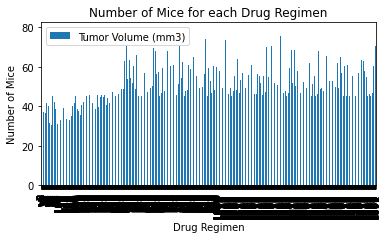

In [99]:
#Bar plot - Pandas
summary_data = summary_data[["Drug Regimen", "Tumor Volume (mm3)"]]

summary_data.plot(kind="bar", figsize=(6, 3))
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()



In [107]:
#Bar plot PyPlot
x_axis = np.arange(summary_df)
tick_locations = [value for value in x_axis]
plt.bar = (x_axis, mouse_count, color="r", alpha=0.5, align = "center")
plt.ticks = (tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol"], rotation="vertical") #drug names
plt.xlim = (-0.75, len(x_axis)-0.25)
plt.ylim = (0, 75)
plt.title = ("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

SyntaxError: invalid syntax (<ipython-input-107-4612e565f8d4>, line 4)

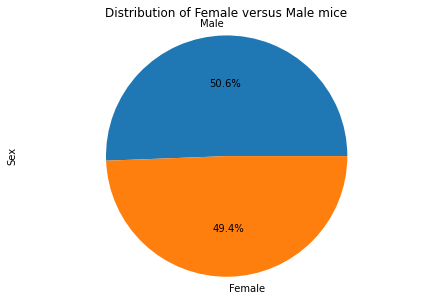

In [57]:
#Pie Plot - Pandas
mouse_count = combined_study_data_df["Sex"].value_counts()
plt.figure()
mouse_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Female versus Male mice")

plt.show()

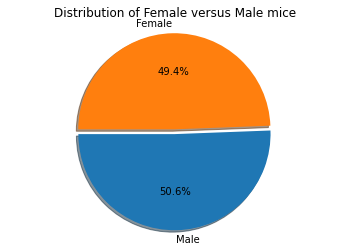

In [108]:
#Pie Plot - Pyplot
labels = ["Male", "Female"]
sizes = [50.6, 49.4]
explode = (0.05,0)         
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("Distribution of Female versus Male mice")
plt.show()

In [59]:
drug_regimen_data = combined_study_data_df[(combined_study_data_df["Drug Regimen"] == "Capomulin") | 
                          (combined_study_data_df["Drug Regimen"] == "Ramicane") | 
                          (combined_study_data_df["Drug Regimen"] == "Infubinol") | 
                          (combined_study_data_df["Drug Regimen"] == "Ceftamin")]

drug_regimen_data = drug_regimen_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
drug_regimen_data = drug_regimen_data.groupby(["Mouse ID", "Drug Regimen"])
drug_regimen_df = drug_regimen_data["Tumor Volume (mm3)"].sum().to_frame()
drug_regimen_plot = drug_regimen_df["Tumor Volume (mm3)"]
drug_regimen_df.head()

# Calculate Quartiles
quartiles = drug_regimen_plot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


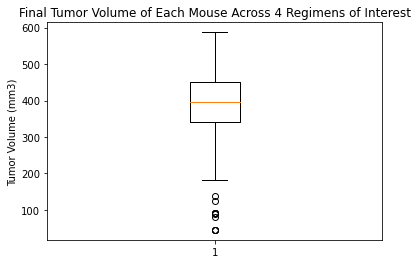

In [60]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across 4 Regimens of Interest")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(drug_regimen_plot)

plt.show()

In [106]:
#Tumor Volume vs Time Point line plot
tumor_time_data_df = combined_study_data_df[(combined_study_data_df["Drug Regimen"] == "Capomulin")
tumor_time_data = combined_study_data_df.groupby(["Drug Regimen", "Timepoint"])
tumor_time_data_df = tumor_time_data["Tumor Volume (mm3)"].mean().to_frame()

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
plt.title("Tumor Volume vs Time Point")
plt.xlim(-10, 50)
plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-106-4f748f87b31c>, line 3)